In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Limpieza de datos

In [2]:
df_demo = pd.read_csv('df_final_demo.csv')
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
df_demo.isnull().any(axis=1).sum()

15

In [4]:
df_demo = df_demo.dropna()
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [5]:
df_demo['clnt_age'] = df_demo['clnt_age'].astype(int)
df_demo

C:\Users\bruno\AppData\Local\Temp\ipykernel_8984\4079634363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['clnt_age'] = df_demo['clnt_age'].astype(int)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68,M,3.0,475114.69,4.0,4.0


In [6]:
df_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age              int32
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [7]:
df_experiment_clients = pd.read_csv('df_final_experiment_clients.csv')
df_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [8]:
df_experiment_clients = df_experiment_clients.rename(columns={'Variation': 'variation'})
df_experiment_clients

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [9]:
df_experiment_clients = df_experiment_clients.dropna()
df_experiment_clients

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [10]:
df_experiment_clients.isnull().any(axis=1).sum()

0

In [11]:
df_experiment_clients.dtypes

client_id     int64
variation    object
dtype: object

In [12]:
df_web_data1 = pd.read_csv('df_final_web_data_pt_1.csv')
df_web_data1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [13]:
df_web_data1.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [14]:
df_web_data2 = pd.read_csv('df_final_web_data_pt_2.csv')
df_web_data2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [15]:
df_web_data2.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [16]:
# concatenar las tablas web data

df_web_data = pd.concat([df_web_data1, df_web_data2], ignore_index=True)
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [17]:
df_web_data.isnull().any(axis=1).sum()

0

In [18]:
df_demo['client_id'] = df_demo['client_id'].astype(int)
df_experiment_clients['client_id'] = df_experiment_clients['client_id'].astype(int)
df_web_data['client_id'] = df_web_data['client_id'].astype(int)

C:\Users\bruno\AppData\Local\Temp\ipykernel_8984\2350653235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['client_id'] = df_demo['client_id'].astype(int)
C:\Users\bruno\AppData\Local\Temp\ipykernel_8984\2350653235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_experiment_clients['client_id'] = df_experiment_clients['client_id'].astype(int)


## Nuevo merge

In [19]:
# Realizar el merge usando el tipo de unión 'left'
df_merged1 = df_experiment_clients.merge(df_web_data, on='client_id', how='left')
df_merged1.dropna(subset=['variation'], inplace=True)
df_merged1.shape

(321309, 6)

In [20]:
df_final = df_merged1.merge(df_demo, on='client_id', how='left')

In [21]:
df_final.columns

Index(['client_id', 'variation', 'visitor_id', 'visit_id', 'process_step',
       'date_time', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [22]:
df_final.dropna(subset=['clnt_age'], inplace=True)
df_final['clnt_age'].isnull().sum()

0

In [23]:
# Filtrar los valores de tipo float y convertirlos a enteros
df_final[df_final['clnt_age'].apply(lambda x: isinstance(x, float))]['clnt_age'].astype('int')



df_final

,client_id,variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0


In [24]:
df_final[df_final['variation'] == 'Test']

,client_id,variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0


# Exploración de datos

In [25]:
df_demo_gendr = df_demo['gendr'].value_counts()
df_demo_gendr

gendr
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

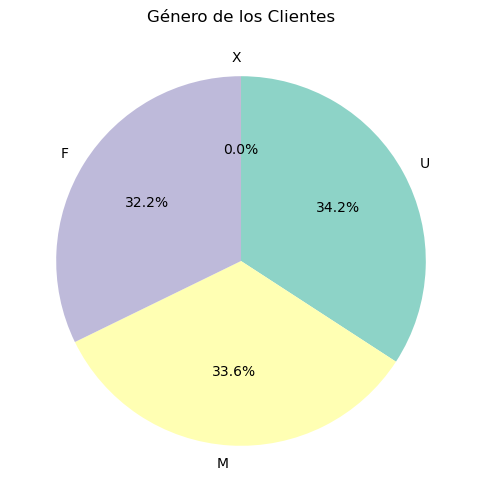

In [26]:
# Crea el gráfico de tarta y ordena las categorías en sentido horario
plt.figure(figsize=(10, 6))
plt.pie(df_demo_gendr, labels=df_demo_gendr.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors, startangle=90, counterclock=False)
plt.title('Género de los Clientes')
plt.show()

In [27]:
max_clnt_age = df_demo['clnt_age'].max()
min_clnt_age = df_demo['clnt_age'].min()

max_clnt_age, min_clnt_age

(96, 13)

In [28]:
mean_clnt_age = int(round(df_demo['clnt_age'].mean()))
median_clnt_age = int(round(df_demo['clnt_age'].median()))
mode_clnt_age = df_demo['clnt_age'].mode()

mean_clnt_age, median_clnt_age, int(mode_clnt_age.values)

C:\Users\bruno\AppData\Local\Temp\ipykernel_8984\1395903998.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean_clnt_age, median_clnt_age, int(mode_clnt_age.values)


(46, 47, 57)

In [29]:
# calculamos la raiz cuadrada de la población, para hacer el histograma
raiz = int(70608 ** (1/2))
raiz

265

<Axes: xlabel='clnt_age', ylabel='Count'>

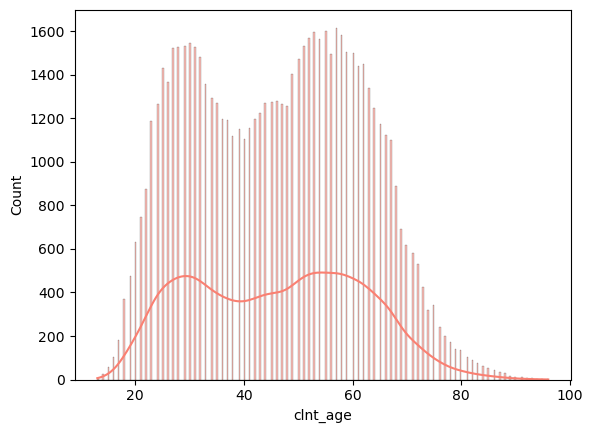

In [30]:
sns.histplot(df_demo['clnt_age'], kde=True, bins=raiz, color="salmon")

In [31]:
max_num_accts = df_demo['num_accts'].max()
min_num_accts = df_demo['num_accts'].min()

max_num_accts, min_num_accts

(8.0, 1.0)

In [32]:
df_demo_num_accts = df_demo['num_accts'].value_counts()
df_demo_num_accts

num_accts
2.0    55496
3.0    12529
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

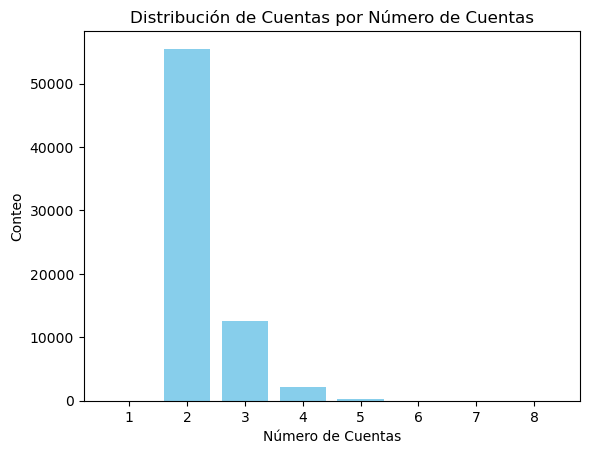

In [33]:

# Ordenar el dataframe por num_accts
#df.sort_values(by='num_accts', inplace=True)

# Crear el gráfico
plt.bar(df_demo_num_accts.index, df_demo_num_accts.values, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Número de Cuentas')
plt.ylabel('Conteo')
plt.title('Distribución de Cuentas por Número de Cuentas')

# Mostrar el gráfico
plt.show()


In [34]:
df_experiment_clients_variation = df_experiment_clients.value_counts('variation')
df_experiment_clients_variation

variation
Test       26968
Control    23532
Name: count, dtype: int64

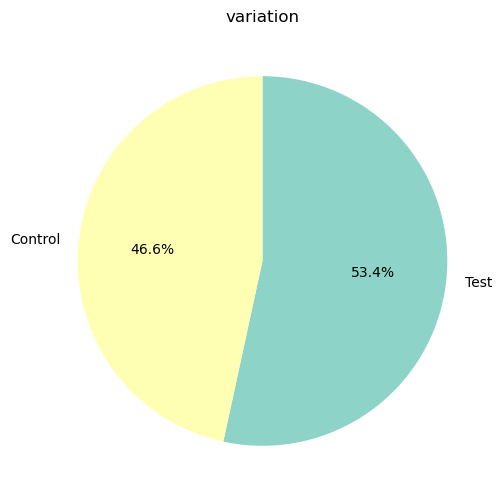

In [35]:
# Crea el gráfico de tarta y ordena las categorías en sentido horario
plt.figure(figsize=(10, 6))
plt.pie(df_experiment_clients_variation, labels=df_experiment_clients_variation.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors, startangle=90, counterclock=False)
plt.title('variation')
plt.show()

In [36]:
df_web_data_process_step = df_web_data.value_counts('process_step')
df_web_data_process_step

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

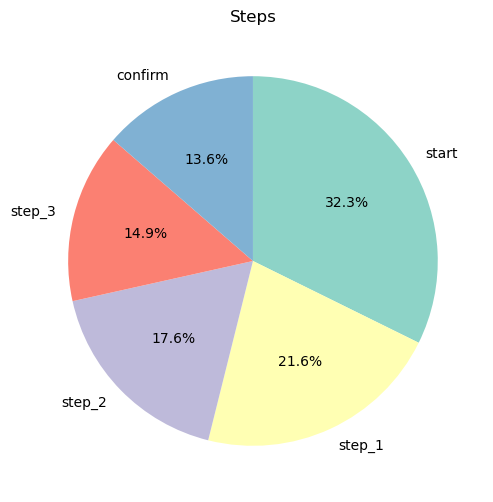

In [37]:
# Crea el gráfico de tarta y ordena las categorías en sentido horario
plt.figure(figsize=(10, 6))
plt.pie(df_web_data_process_step, labels=df_web_data_process_step.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors, startangle=90, counterclock=False)
plt.title('Steps')
plt.show()

In [38]:
raiz_final = int(321309 ** (1/2))
raiz_final 

566

In [39]:
raiz_demo = int(70609 ** (1/2))
raiz_demo

265

<Axes: xlabel='bal', ylabel='Count'>

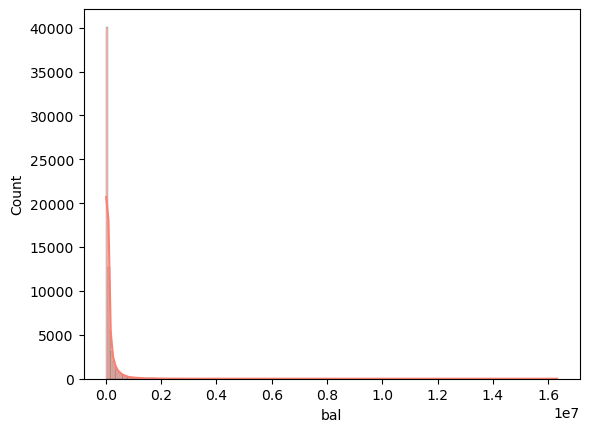

In [40]:
sns.histplot(df_demo['bal'], kde=True, bins=raiz_demo, color="salmon")

# Contraste de hipótesis de 'balance'

### Eliminamos outliers

In [41]:
q1 = df_final['bal'].quantile(0.25)
q3 = df_final['bal'].quantile(0.75)
rango_inter_bal = round(q3 - q1, 2)
rango_inter_bal

110434.1

In [42]:
q1 = df_final['clnt_tenure_yr'].quantile(0.25)
q3 = df_final['clnt_tenure_yr'].quantile(0.75)
rango_inter_tenure = round(q3 - q1, 2)
rango_inter_tenure

10.0

In [43]:
outliers_bal = q3 + rango_inter_bal * 1.5
outliers_bal

165667.15000000002

In [44]:
outliers_tenure = q3 + rango_inter_bal * 1.5
outliers_tenure

165667.15000000002

<Axes: ylabel='bal'>

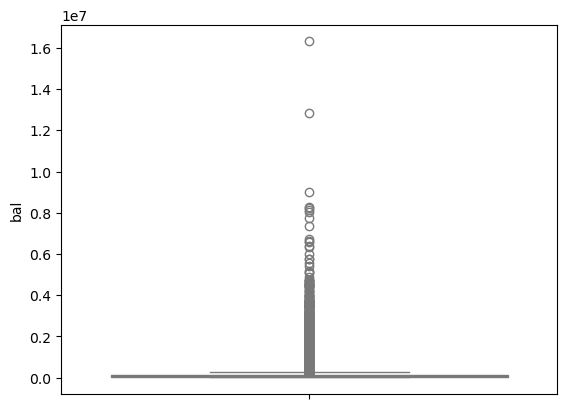

In [45]:
sns.boxplot(data = df_demo['bal'], color="lightblue")

In [ ]:
# mostramos los outliers
df_outliers = df_final[df_final['bal'] > outliers_bal]
df_outliers

,client_id,variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321211,697367,Test,275824127_12870981797,83289280_89636429134_919570,start,2017-04-04 20:07:29,4.0,58.0,71.0,U,2.0,185235.88,6.0,9.0
321212,697367,Test,275824127_12870981797,83289280_89636429134_919570,start,2017-04-04 20:06:47,4.0,58.0,71.0,U,2.0,185235.88,6.0,9.0
321213,697367,Test,275824127_12870981797,83289280_89636429134_919570,start,2017-04-04 20:04:18,4.0,58.0,71.0,U,2.0,185235.88,6.0,9.0
321246,8730282,Control,207079190_70980466142,447063016_91750701649_632942,start,2017-04-13 11:23:20,27.0,334.0,50.0,F,3.0,464879.31,2.0,5.0


### Realizamos un plot de las muestras 'Test' y 'Control'

In [137]:
df_final[(df_final['bal'] < outliers_bal) & (df_final['variation'] == 'Test')]['bal']

15        36001.90
16        36001.90
17        36001.90
18        36001.90
19        36001.90
            ...   
321304    93103.47
321305    93103.47
321306    93103.47
321307    93103.47
321308    93103.47
Name: bal, Length: 136759, dtype: float64

<Axes: xlabel='bal', ylabel='Count'>

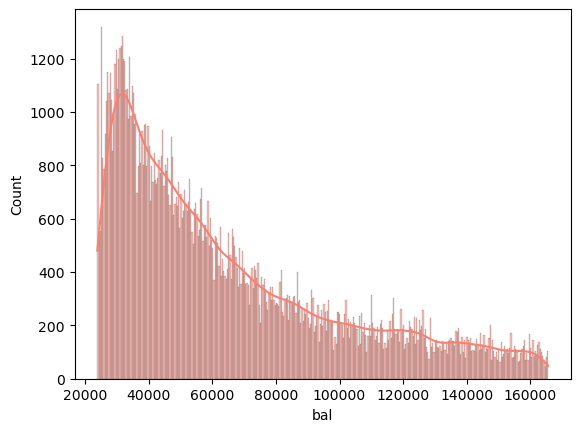

In [138]:
sns.histplot(df_final[(df_final['bal'] < outliers_bal) & (df_final['variation'] == 'Test')]['bal'], kde=True, bins=int(136_759 ** (1/2)), color="salmon")

In [139]:
df_final[(df_final['bal'] < outliers_bal) & (df_final['variation'] == 'Control')]['bal']

20        142642.26
21        142642.26
22        142642.26
23        142642.26
24        142642.26
            ...    
321265     60344.67
321266    141808.05
321267    141808.05
321268    141808.05
321269    141808.05
Name: bal, Length: 110992, dtype: float64

<Axes: xlabel='bal', ylabel='Count'>

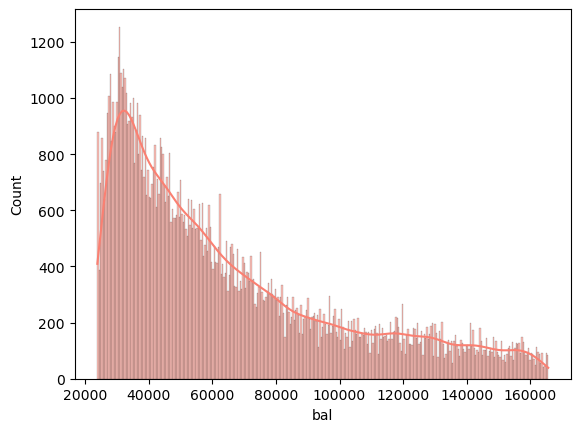

In [140]:
sns.histplot(df_final[(df_final['bal'] < outliers_bal) & (df_final['variation'] == 'Control')]['bal'], kde=True, bins=int(110_992 ** (1/2)), color="salmon")

In [55]:
df_bal_control_small = df_final[(df_final['bal'] < 70_000) & (df_final['variation'] == 'Control')]['bal']
df_bal_control_small

40        34254.54
41        34254.54
81        39795.28
82        39795.28
83        39795.28
            ...   
321261    60344.67
321262    60344.67
321263    60344.67
321264    60344.67
321265    60344.67
Name: bal, Length: 72634, dtype: float64

In [56]:
df_bal_test_small = df_final[df_final['variation'] == 'Test']['bal'].sort_values().iloc[0:51697]
df_bal_test_small


226892    23789.44
226891    23789.44
226890    23789.44
226889    23789.44
226888    23789.44
            ...   
251026    44514.49
251024    44514.49
251022    44514.49
251023    44514.49
148586    44515.18
Name: bal, Length: 51697, dtype: float64

In [57]:
df_bal_test_medium = df_final[(df_final['bal'] > 25_000) & (df_final['bal'] < 125_000)  & (df_final['variation'] == 'Test')]['bal']
df_bal_test_medium

15        36001.90
16        36001.90
17        36001.90
18        36001.90
19        36001.90
            ...   
321304    93103.47
321305    93103.47
321306    93103.47
321307    93103.47
321308    93103.47
Name: bal, Length: 121428, dtype: float64

In [58]:
df_bal_test_medium = df_final[df_final['variation'] == 'Test']['bal'].sort_values().iloc[51698:103395]
df_bal_test_medium

148584    44515.18
148581    44515.18
148582    44515.18
148583    44515.18
287828    44517.64
            ...   
50095     86430.45
50094     86430.45
50093     86430.45
50092     86430.45
50091     86430.45
Name: bal, Length: 51697, dtype: float64

In [59]:
51697 + 51697

103394

In [60]:
df_bal_test_large = df_final[(df_final['bal'] > 70_000) & (df_final['bal'] < outliers_bal) & (df_final['variation'] == 'Test')]['bal']
df_bal_test_large

90        89161.52
91        89161.52
92        89161.52
93        89161.52
94        89161.52
            ...   
321304    93103.47
321305    93103.47
321306    93103.47
321307    93103.47
321308    93103.47
Name: bal, Length: 47100, dtype: float64

In [61]:
df_bal_test_large = df_final[df_final['variation'] == 'Test']['bal'].sort_values().iloc[103395:155092]
df_bal_test_large

50090      86430.45
50089      86430.45
152300     86437.53
152306     86437.53
152305     86437.53
            ...    
287681    287696.13
287680    287696.13
287695    287696.13
287699    287696.13
91634     287870.18
Name: bal, Length: 51697, dtype: float64

In [62]:
51697 * 3

155091

In [63]:
df_final['clnt_tenure_yr']

0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
321304    4.0
321305    4.0
321306    4.0
321307    4.0
321308    4.0
Name: clnt_tenure_yr, Length: 321195, dtype: float64

<Axes: xlabel='bal', ylabel='Count'>

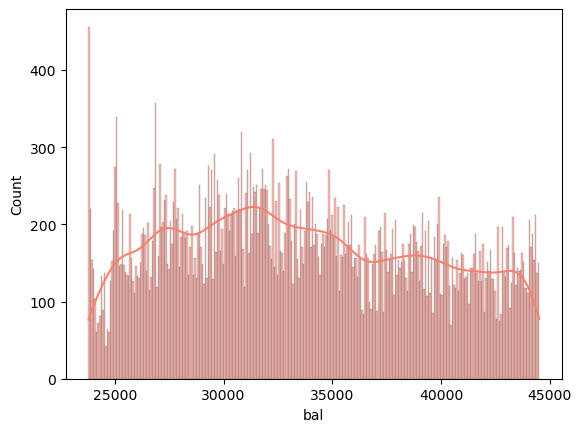

In [67]:
sns.histplot(df_bal_test_small, kde=True, bins=int(89659 ** (1/2)), color="salmon")

<Axes: xlabel='bal', ylabel='Count'>

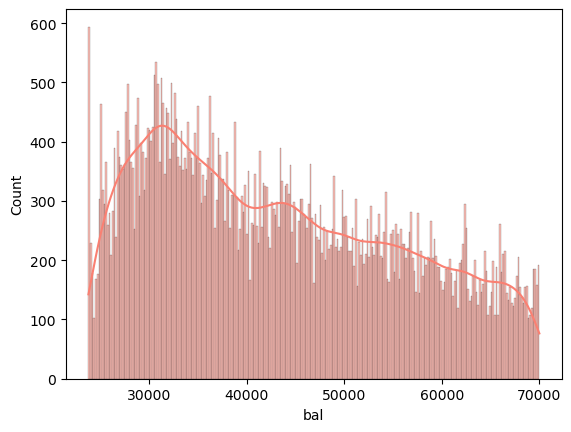

In [68]:
sns.histplot(df_bal_control_small, kde=True, bins=int(72634 ** (1/2)), color="salmon")                                         

Text(0.5, 1.0, 'Box-Cox Transformed bal-test-small')

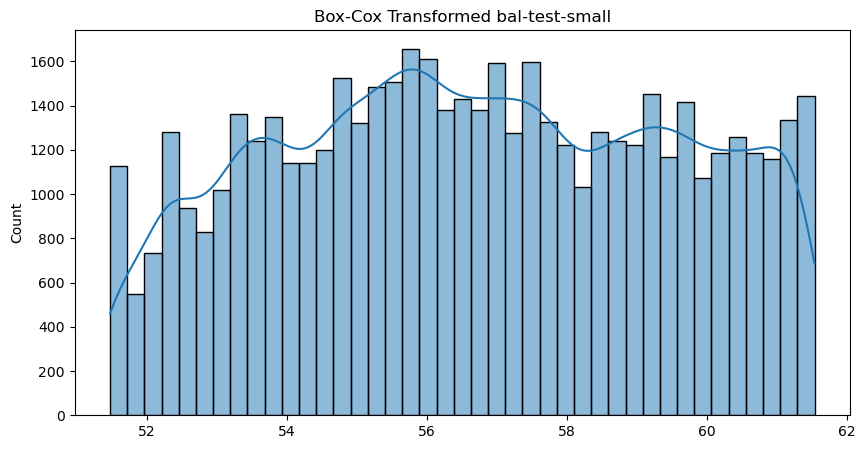

In [69]:
from scipy.stats import boxcox
import numpy as np

# Applying Box-Cox transformation to 'df_final'
df_boxcox, _ = boxcox(df_bal_test_small)

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'df_final'
sns.histplot(df_boxcox, kde=True)
plt.title('Box-Cox Transformed bal-test-small')

Text(0.5, 1.0, 'Box-Cox Transformed bal-test-large')

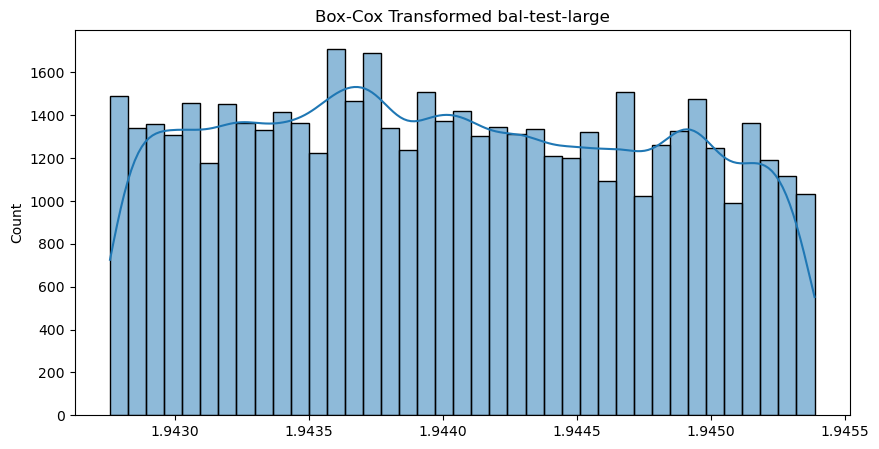

In [70]:
from scipy.stats import boxcox
import numpy as np

# Applying Box-Cox transformation to 'df_final'
df_boxcox, _ = boxcox(df_bal_test_large)

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'df_final'
sns.histplot(df_boxcox, kde=True)
plt.title('Box-Cox Transformed bal-test-large')

In [71]:
df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]['bal'].mean(), df_final[(df_final['variation'] == 'Control') & (df_final['bal'] < outliers_bal)]['bal'].mean()

(65207.225591515, 65345.54916147109)

In [72]:
df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]['bal'].median(), df_final[(df_final['variation'] == 'Control') & (df_final['bal'] < outliers_bal)]['bal'].median()

(53755.72, 53994.91)

In [73]:
from scipy.stats import ks_2samp

# Prueba K-S
ks_stat, p_value = ks_2samp(df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]['bal'], df_final[(df_final['variation'] == 'Control') & (df_final['bal'] < outliers_bal)]['bal'])

print(f"Estadístico K-S: {ks_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las poblaciones tienen distribuciones diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las distribuciones son diferentes.")

Estadístico K-S: 0.0071
p-valor: 0.0039
Rechazamos la hipótesis nula: Las poblaciones tienen distribuciones diferentes.


In [74]:
from scipy.stats import expon

# Ajustar distribución exponencial a cada población
lambda1 = 1 / np.mean(df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]['bal'])
lambda2 = 1 / np.mean(df_final[(df_final['variation'] == 'Control') & (df_final['bal'] < outliers_bal)]['bal'])

print(f"Parámetro lambda (Población 1): {lambda1:.4f}")
print(f"Parámetro lambda (Población 2): {lambda2:.4f}")

# Comparación de parámetros
if np.isclose(lambda1, lambda2, rtol=0.1):
    print("Los parámetros lambda son similares; las poblaciones podrían provenir de la misma distribución.")
else:
    print("Los parámetros lambda son diferentes; las poblaciones podrían no provenir de la misma distribución.")

Parámetro lambda (Población 1): 0.0000
Parámetro lambda (Población 2): 0.0000
Los parámetros lambda son similares; las poblaciones podrían provenir de la misma distribución.


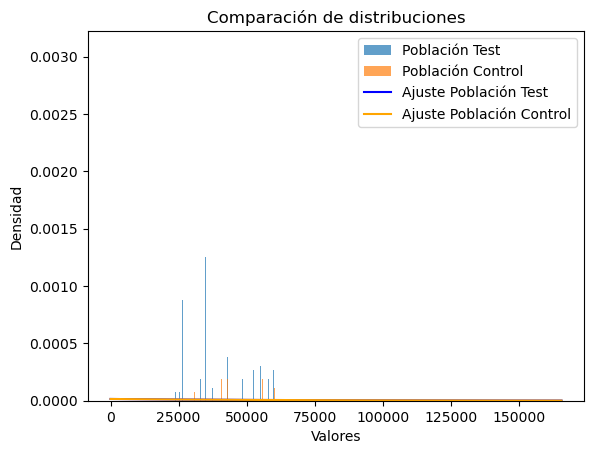

In [75]:
import matplotlib.pyplot as plt

# Graficar histogramas
plt.hist(df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < 70_000)]['bal'], bins=157_566, alpha=0.7, label="Población Test", density=True)
plt.hist(df_final[(df_final['variation'] == 'Control') & (df_final['bal'] < 70_000)]['bal'], bins=127_190, alpha=0.7, label="Población Control", density=True)

# Añadir las curvas ajustadas
x = np.linspace(0, np.max([df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]['bal'].max(), df_final[(df_final['variation'] == 'Control') & (df_final['bal'] < outliers_bal)]['bal'].max()]), 1000)
plt.plot(x, lambda1 * np.exp(-lambda1 * x), label="Ajuste Población Test", color='blue')
plt.plot(x, lambda2 * np.exp(-lambda2 * x), label="Ajuste Población Control", color='orange')

plt.legend()
plt.title("Comparación de distribuciones")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.show()

In [136]:
import scipy.stats as st
st.ttest_ind(df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]['bal'], df_final[(df_final['variation'] == 'Control') & (df_final['bal'] < outliers_bal)]['bal'], equal_var=False)

TtestResult(statistic=-0.9551578242118628, pvalue=0.3394988632327114, df=237399.5831890553)

In [76]:
df_age_test = df_final[df_final['variation'] == 'Test'].drop_duplicates(subset='client_id', keep='last').sort_values(by='client_id')
df_age_test = df_age_test['clnt_age']
df_age_test

94261     29.0
180548    57.0
81938     51.0
272029    42.0
157166    46.0
          ... 
293371    30.0
237234    28.0
248212    35.0
140284    31.0
14818     49.0
Name: clnt_age, Length: 26961, dtype: float64

<Axes: xlabel='clnt_age', ylabel='Count'>

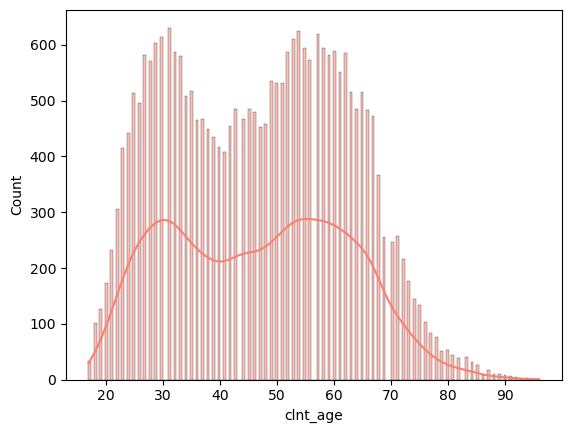

In [77]:
# Eliminar valores duplicados en la columna 'category' y mantener el último registro
sns.histplot(df_age_test, kde=True, bins=int(26_961 ** (1/2)), color="salmon") 

In [78]:
df_age_control = df_final[df_final['variation'] == 'Control'].drop_duplicates(subset='client_id', keep='last').sort_values(by='client_id')
df_age_control = df_age_control['clnt_age']
df_age_control

173012    36.0
37911     48.0
311045    22.0
17692     54.0
41685     28.0
          ... 
32615     57.0
20909     60.0
272264    36.0
156319    61.0
155808    38.0
Name: clnt_age, Length: 23526, dtype: float64

<Axes: xlabel='clnt_age', ylabel='Count'>

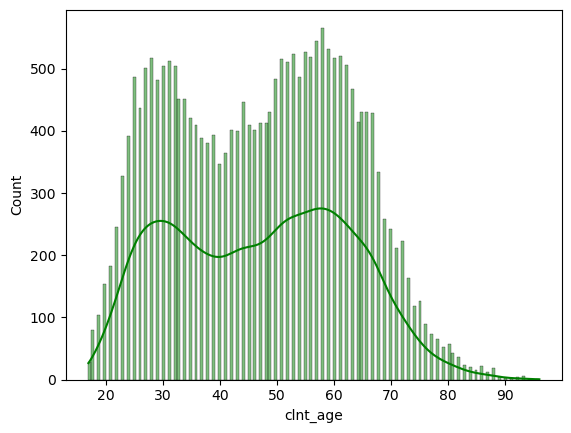

In [79]:
# Eliminar valores duplicados en la columna 'category' y mantener el último registro
sns.histplot(df_age_control, kde=True, bins=int(23_526 ** (1/2)), color="green")

In [80]:
df_age_control[(df_age_control <= 25)]

311045    22.0
232549    22.0
195316    25.0
223218    21.0
34589     22.0
          ... 
24648     21.0
266501    25.0
137881    18.0
218157    22.0
236122    25.0
Name: clnt_age, Length: 1999, dtype: float64

In [81]:
import numpy as np
from scipy.stats import chi2_contingency

# Datos: Tabla de contingencia (frecuencias observadas)
observed = np.array([[2_345, 7_925, 10_663, 6_028],   
                     [1_999, 6_699, 9_404, 5_424]])  

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(observed)

# Resultados
print(f"Chi-cuadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

# Interpretación
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula: Las distribuciones no son homogéneas entre los grupos.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las distribuciones no son homogéneas entre los grupos.")


Chi-cuadrado: 7.5125
p-valor: 0.0572
Grados de libertad: 3
Frecuencias esperadas:
[[ 2319.77705152  7809.48885852 10716.15241547  6115.58167449]
 [ 2024.22294848  6814.51114148  9350.84758453  5336.41832551]]
No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las distribuciones no son homogéneas entre los grupos.


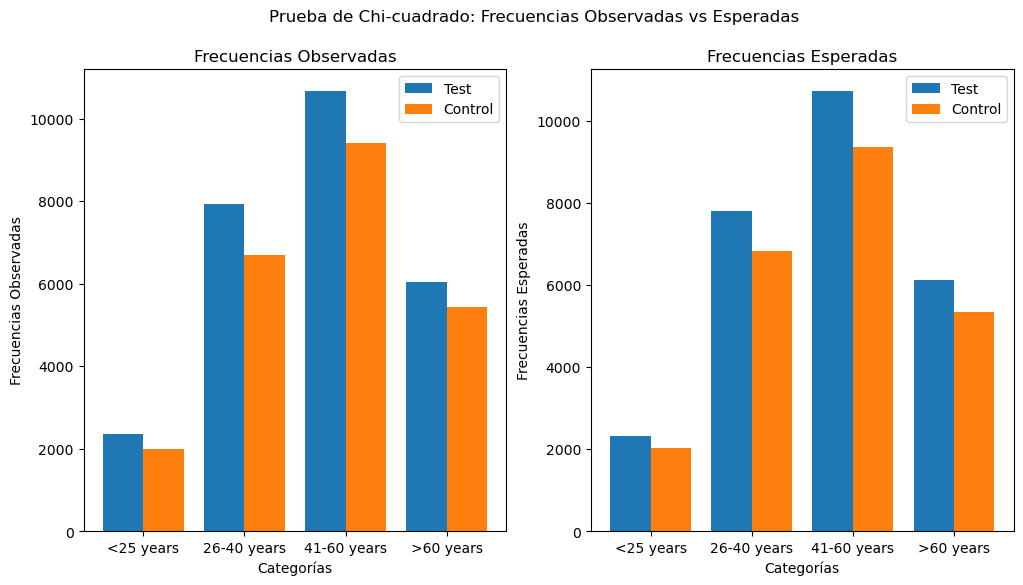

In [82]:
# Visualización
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para frecuencias observadas y esperadas
categories = ['<25 years', '26-40 years', '41-60 years', '>60 years']
x = np.arange(len(categories))

ax[0].bar(x - 0.2, observed[0], 0.4, label='Test')
ax[0].bar(x + 0.2, observed[1], 0.4, label='Control')
ax[0].set_xlabel('Categorías')
ax[0].set_ylabel('Frecuencias Observadas')
ax[0].set_title('Frecuencias Observadas')
ax[0].set_xticks(x)
ax[0].set_xticklabels(categories)
ax[0].legend()

ax[1].bar(x - 0.2, expected[0], 0.4, label='Test')
ax[1].bar(x + 0.2, expected[1], 0.4, label='Control')
ax[1].set_xlabel('Categorías')
ax[1].set_ylabel('Frecuencias Esperadas')
ax[1].set_title('Frecuencias Esperadas')
ax[1].set_xticks(x)
ax[1].set_xticklabels(categories)
ax[1].legend()

plt.suptitle('Prueba de Chi-cuadrado: Frecuencias Observadas vs Esperadas')
plt.show()


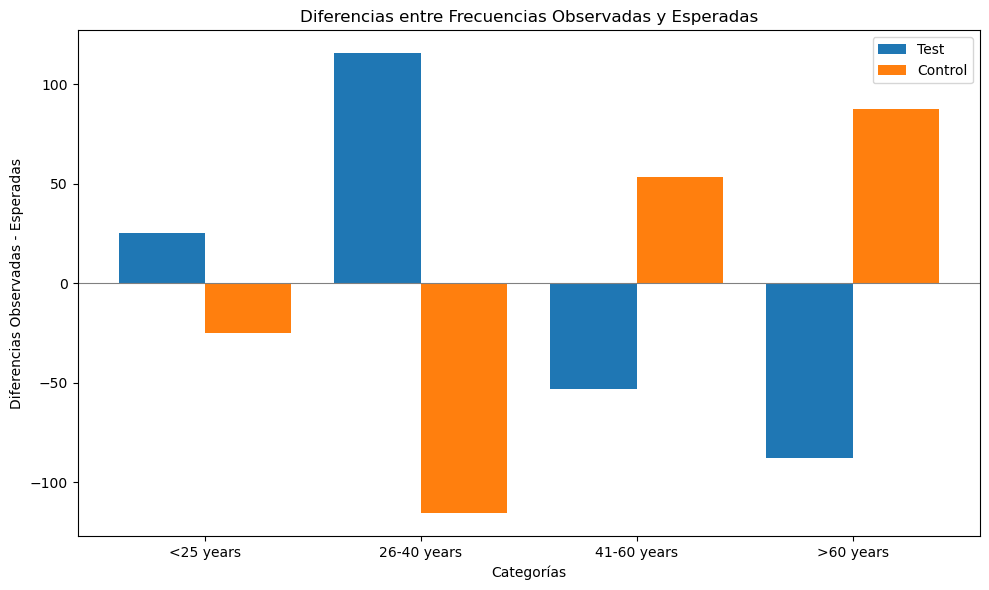

In [83]:
# Visualización
categories = ['<25 years', '26-40 years', '41-60 years', '>60 years']
x = np.arange(len(categories))

# Gráfico de barras de diferencias
differences_test = observed[0] - expected[0]
differences_control = observed[1] - expected[1]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - 0.2, differences_test, 0.4, label='Test')
ax.bar(x + 0.2, differences_control, 0.4, label='Control')
ax.axhline(0, color='gray', linewidth=0.8)  # Línea base en y = 0

ax.set_xlabel('Categorías')
ax.set_ylabel('Diferencias Observadas - Esperadas')
ax.set_title('Diferencias entre Frecuencias Observadas y Esperadas')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()


In [84]:
df_final[(df_final['clnt_tenure_yr'] > 10) & (df_final['variation'] == 'Test')]

,client_id,variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
15,8320017,Test,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,22.0,274.0,34.0,M,2.0,36001.9,5.0,8.0
16,8320017,Test,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43,22.0,274.0,34.0,M,2.0,36001.9,5.0,8.0
17,8320017,Test,39393514_33118319366,960651974_70596002104_312201,step_2,2017-04-05 13:08:40,22.0,274.0,34.0,M,2.0,36001.9,5.0,8.0
18,8320017,Test,39393514_33118319366,960651974_70596002104_312201,step_1,2017-04-05 13:08:24,22.0,274.0,34.0,M,2.0,36001.9,5.0,8.0
19,8320017,Test,39393514_33118319366,960651974_70596002104_312201,start,2017-04-05 13:08:06,22.0,274.0,34.0,M,2.0,36001.9,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321295,5230357,Test,832474317_11880812098,28245330_61880751416_631586,confirm,2017-04-19 11:24:46,23.0,278.0,30.0,M,2.0,61349.7,0.0,3.0
321296,5230357,Test,832474317_11880812098,28245330_61880751416_631586,step_3,2017-04-19 11:24:09,23.0,278.0,30.0,M,2.0,61349.7,0.0,3.0
321297,5230357,Test,832474317_11880812098,97970868_52428347383_438804,step_2,2017-04-19 11:23:16,23.0,278.0,30.0,M,2.0,61349.7,0.0,3.0
321298,5230357,Test,832474317_11880812098,97970868_52428347383_438804,step_1,2017-04-19 11:23:10,23.0,278.0,30.0,M,2.0,61349.7,0.0,3.0


In [85]:
import numpy as np
from scipy.stats import chi2_contingency

# Datos: Tabla de contingencia (frecuencias observadas)
observed = np.array([[201, 85_167, 91_619],   
                     [209, 69_116, 74_083]]) 

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(observed)

# Resultados
print(f"Chi-cuadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

# Interpretación
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula: Las variables no son independientes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las variables no son independientes.")

Chi-cuadrado: 6.6746
p-valor: 0.0355
Grados de libertad: 2
Frecuencias esperadas:
[[  226.4850263  85226.31539506 91534.19957865]
 [  183.5149737  69056.68460494 74167.80042135]]
Rechazamos la hipótesis nula: Las variables no son independientes.


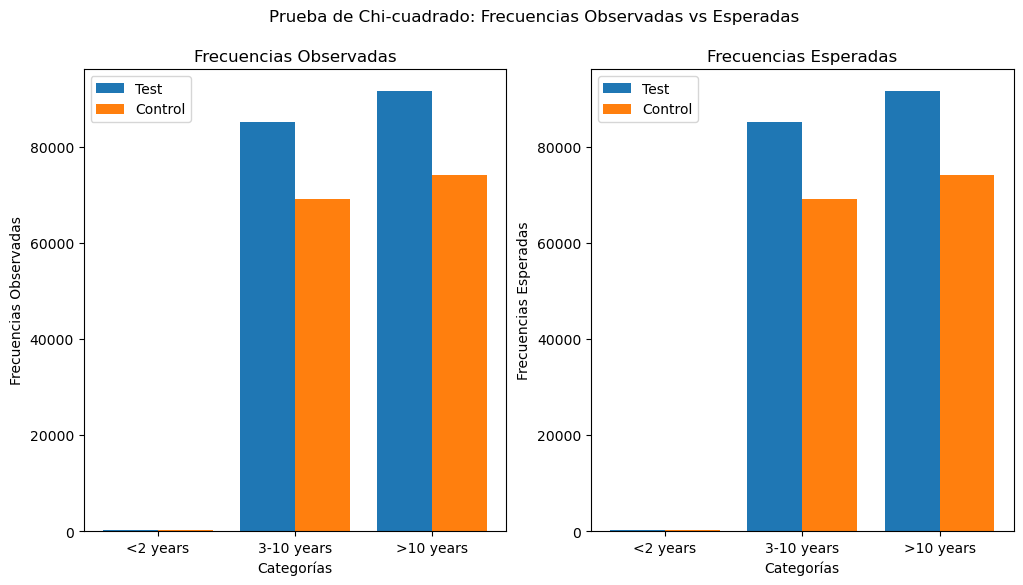

In [86]:
# Visualización
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para frecuencias observadas y esperadas
categories = ['<2 years', '3-10 years', '>10 years']
x = np.arange(len(categories))

ax[0].bar(x - 0.2, observed[0], 0.4, label='Test')
ax[0].bar(x + 0.2, observed[1], 0.4, label='Control')
ax[0].set_xlabel('Categorías')
ax[0].set_ylabel('Frecuencias Observadas')
ax[0].set_title('Frecuencias Observadas')
ax[0].set_xticks(x)
ax[0].set_xticklabels(categories)
ax[0].legend()

ax[1].bar(x - 0.2, expected[0], 0.4, label='Test')
ax[1].bar(x + 0.2, expected[1], 0.4, label='Control')
ax[1].set_xlabel('Categorías')
ax[1].set_ylabel('Frecuencias Esperadas')
ax[1].set_title('Frecuencias Esperadas')
ax[1].set_xticks(x)
ax[1].set_xticklabels(categories)
ax[1].legend()

plt.suptitle('Prueba de Chi-cuadrado: Frecuencias Observadas vs Esperadas')
plt.show()

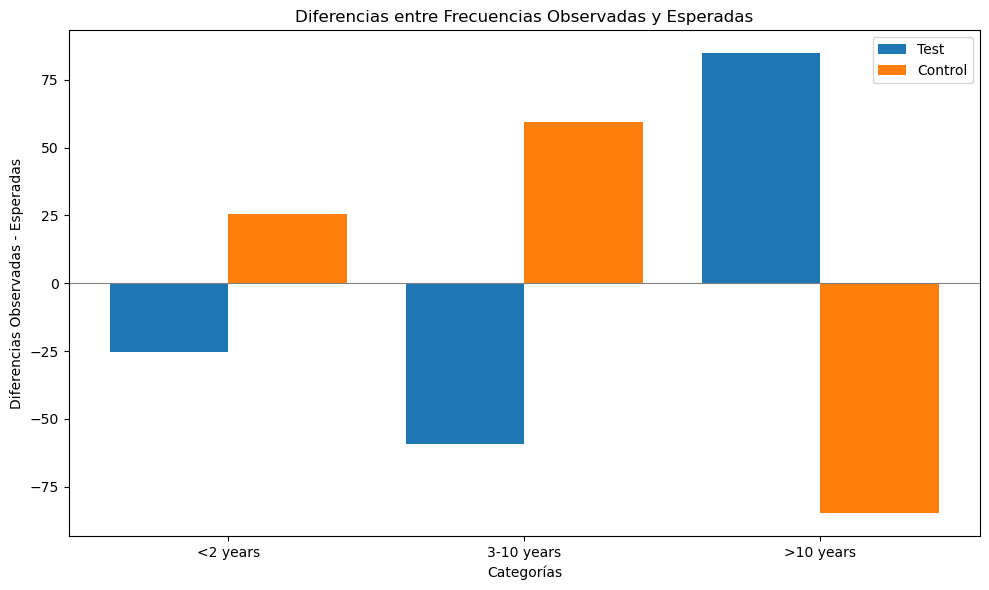

In [87]:
# Visualización
categories = ['<2 years', '3-10 years', '>10 years']
x = np.arange(len(categories))

# Gráfico de barras de diferencias
differences_test = observed[0] - expected[0]
differences_control = observed[1] - expected[1]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - 0.2, differences_test, 0.4, label='Test')
ax.bar(x + 0.2, differences_control, 0.4, label='Control')
ax.axhline(0, color='gray', linewidth=0.8)  # Línea base en y = 0

ax.set_xlabel('Categorías')
ax.set_ylabel('Diferencias Observadas - Esperadas')
ax.set_title('Diferencias entre Frecuencias Observadas y Esperadas')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Box-Cox Transformed tenure')

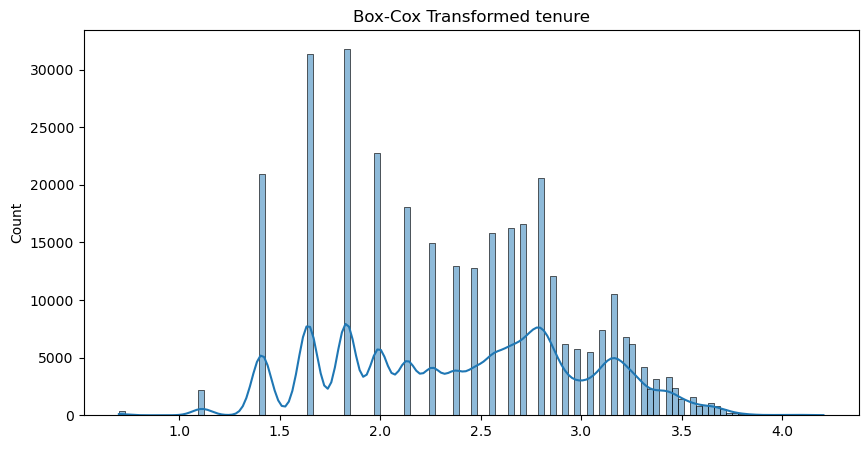

In [88]:
from scipy.stats import boxcox
import numpy as np

# Applying Box-Cox transformation to 'df_final'
df_boxcox, _ = boxcox(df_final[df_final['clnt_tenure_yr'] < outliers_tenure]['clnt_tenure_yr'])

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'df_final'
sns.histplot(df_boxcox, kde=True)
plt.title('Box-Cox Transformed tenure')

In [89]:
# Conducting the Kolmogorov-Smirnov test for normality on 'SalePrice'
# First, we need to standardize the data to have mean 0 and variance 1 since we're comparing against a standard normal distribution
standardized = (df_boxcox - df_boxcox.mean()) / df_boxcox.std()
ks_test_statistic, ks_p_value = stats.kstest(standardized, 'norm')

ks_test_statistic, ks_p_value

(0.09785801032681601, 0.0)

In [90]:
# print the test result
if ks_p_value < 0.05:
    print('The test results indicate that the distribution of prices is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of prices is not significantly different from a normal distribution.')

The test results indicate that the distribution of prices is significantly different from a normal distribution.


In [131]:
df_tenure_test = df_final[df_final['variation'] == 'Test'].drop_duplicates(subset='client_id', keep='last')
df_tenure_test = df_tenure_test['clnt_tenure_yr']
df_tenure_test

14         5.0
19        22.0
39         6.0
47        11.0
55        21.0
          ... 
321223    19.0
321245    14.0
321294     6.0
321299    23.0
321308     4.0
Name: clnt_tenure_yr, Length: 26961, dtype: float64

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

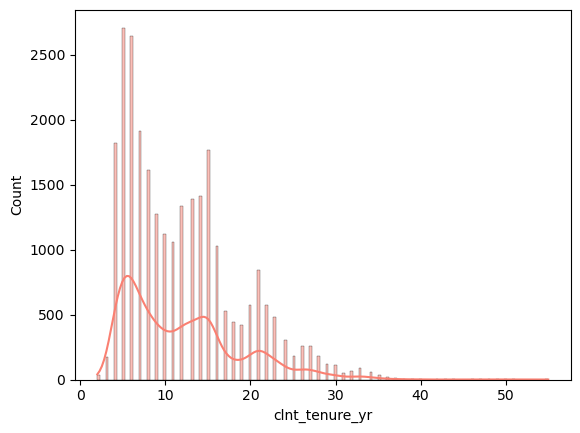

In [132]:
# Eliminar valores duplicados en la columna 'category' y mantener el último registro
sns.histplot(df_tenure_test, kde=True, bins=int(26_961 ** (1/2)), color="salmon") 

In [133]:
df_tenure_control = df_final[df_final['variation'] == 'Control'].drop_duplicates(subset='client_id', keep='last')
df_tenure_control = df_tenure_control['clnt_tenure_yr']
df_tenure_control

34        12.0
41         5.0
72        13.0
89         6.0
147       12.0
          ... 
321228     7.0
321247    27.0
321254    18.0
321265    15.0
321269    21.0
Name: clnt_tenure_yr, Length: 23526, dtype: float64

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

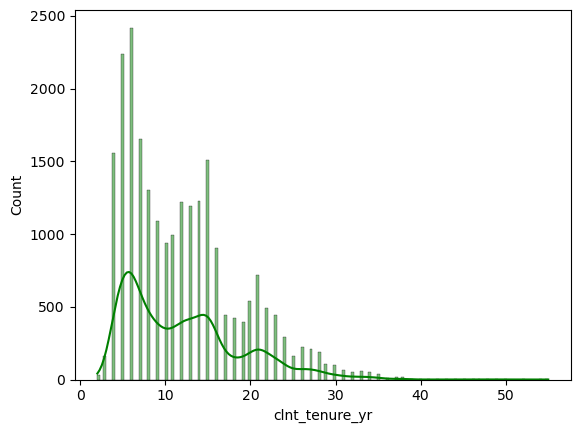

In [135]:
# Eliminar valores duplicados en la columna 'category' y mantener el último registro
sns.histplot(df_tenure_control, kde=True, bins=int(23_526 ** (1/2)), color="green") 

In [125]:
len(df_tenure_control[(df_tenure_control > 10)])

12132

In [126]:
import numpy as np
from scipy.stats import chi2_contingency

# Datos: Tabla de contingencia (frecuencias observadas)
observed = np.array([[208, 13_102, 13_651],   
                     [190, 11_204, 12_132]])  

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(observed)

# Resultados
print(f"Chi-cuadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

# Interpretación
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula: Las distribuciones no son homogéneas entre los grupos.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las distribuciones no son homogéneas entre los grupos.")

Chi-cuadrado: 4.8303
p-valor: 0.0894
Grados de libertad: 2
Frecuencias esperadas:
[[  212.53942599 12979.85750787 13768.60306614]
 [  185.46057401 11326.14249213 12014.39693386]]
No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las distribuciones no son homogéneas entre los grupos.


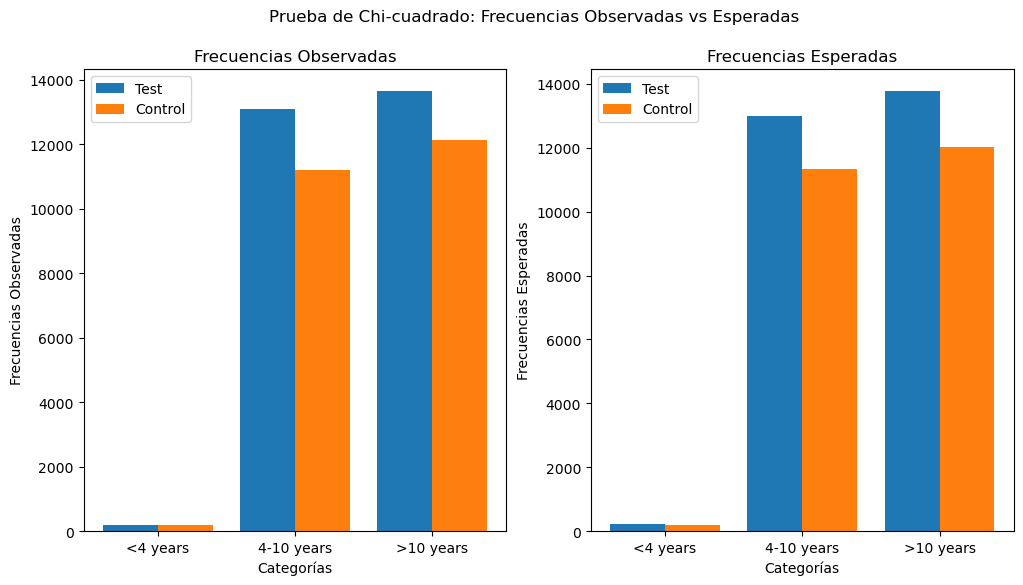

In [128]:
# Visualización
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para frecuencias observadas y esperadas
categories = ['<4 years', '4-10 years', '>10 years']
x = np.arange(len(categories))

ax[0].bar(x - 0.2, observed[0], 0.4, label='Test')
ax[0].bar(x + 0.2, observed[1], 0.4, label='Control')
ax[0].set_xlabel('Categorías')
ax[0].set_ylabel('Frecuencias Observadas')
ax[0].set_title('Frecuencias Observadas')
ax[0].set_xticks(x)
ax[0].set_xticklabels(categories)
ax[0].legend()

ax[1].bar(x - 0.2, expected[0], 0.4, label='Test')
ax[1].bar(x + 0.2, expected[1], 0.4, label='Control')
ax[1].set_xlabel('Categorías')
ax[1].set_ylabel('Frecuencias Esperadas')
ax[1].set_title('Frecuencias Esperadas')
ax[1].set_xticks(x)
ax[1].set_xticklabels(categories)
ax[1].legend()

plt.suptitle('Prueba de Chi-cuadrado: Frecuencias Observadas vs Esperadas')
plt.show()

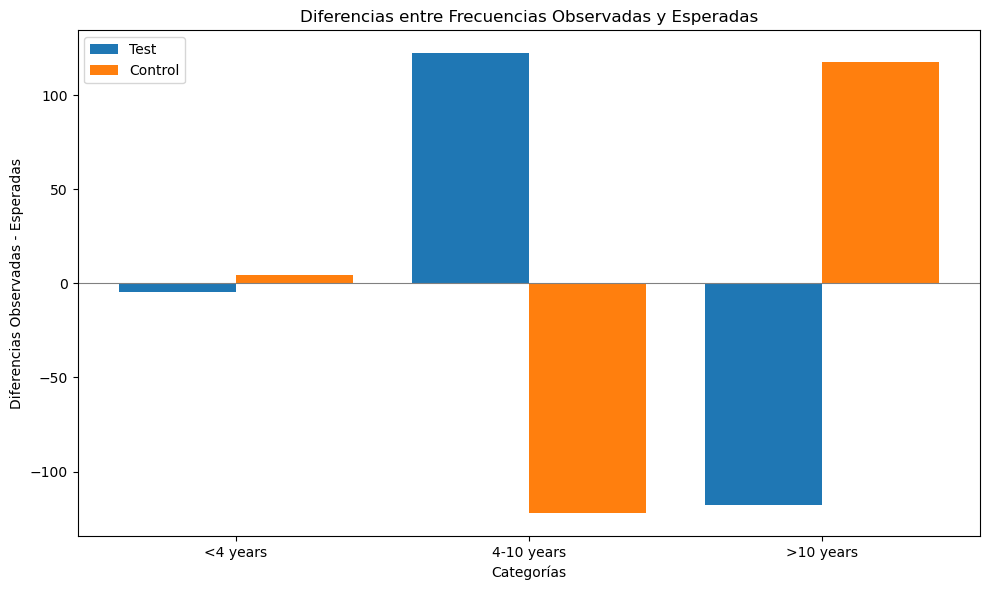

In [129]:
# Visualización
categories = ['<4 years', '4-10 years', '>10 years']
x = np.arange(len(categories))

# Gráfico de barras de diferencias
differences_test = observed[0] - expected[0]
differences_control = observed[1] - expected[1]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - 0.2, differences_test, 0.4, label='Test')
ax.bar(x + 0.2, differences_control, 0.4, label='Control')
ax.axhline(0, color='gray', linewidth=0.8)  # Línea base en y = 0

ax.set_xlabel('Categorías')
ax.set_ylabel('Diferencias Observadas - Esperadas')
ax.set_title('Diferencias entre Frecuencias Observadas y Esperadas')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

In [104]:
df_age_control

173012    36.0
37911     48.0
311045    22.0
17692     54.0
41685     28.0
          ... 
32615     57.0
20909     60.0
272264    36.0
156319    61.0
155808    38.0
Name: clnt_age, Length: 23526, dtype: float64

In [91]:
df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]

,client_id,variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
15,8320017,Test,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,22.0,274.0,34.0,M,2.0,36001.90,5.0,8.0
16,8320017,Test,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43,22.0,274.0,34.0,M,2.0,36001.90,5.0,8.0
17,8320017,Test,39393514_33118319366,960651974_70596002104_312201,step_2,2017-04-05 13:08:40,22.0,274.0,34.0,M,2.0,36001.90,5.0,8.0
18,8320017,Test,39393514_33118319366,960651974_70596002104_312201,step_1,2017-04-05 13:08:24,22.0,274.0,34.0,M,2.0,36001.90,5.0,8.0
19,8320017,Test,39393514_33118319366,960651974_70596002104_312201,start,2017-04-05 13:08:06,22.0,274.0,34.0,M,2.0,36001.90,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0


In [92]:
155091 / 3

51697.0

<Axes: xlabel='bal', ylabel='Count'>

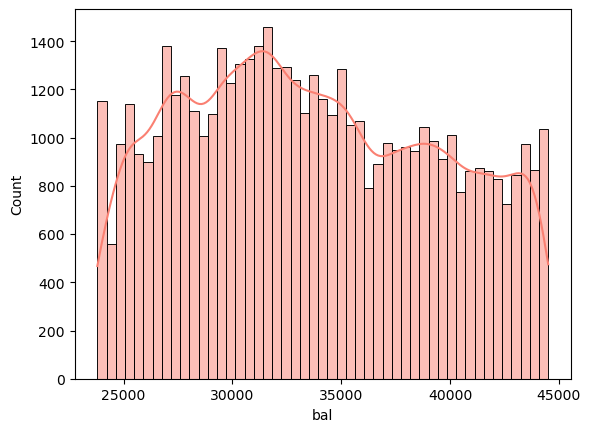

In [93]:
sns.histplot(df_bal_test_small, kde=True, bins=int(2_421 ** (1/2)), color="salmon")

Text(0.5, 1.0, 'Box-Cox Transformed bal-test-small')

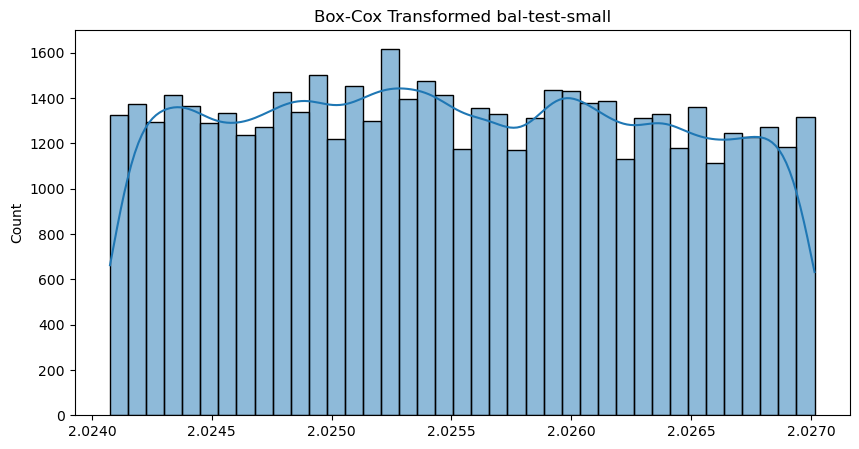

In [94]:
from scipy.stats import boxcox

# Applying Box-Cox transformation to 'bal-test-small'
df_boxcox, _ = boxcox(df_bal_test_medium)

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'LotArea'
sns.histplot(df_boxcox, kde=True)
plt.title('Box-Cox Transformed bal-test-small')

<Axes: xlabel='clnt_age', ylabel='bal'>

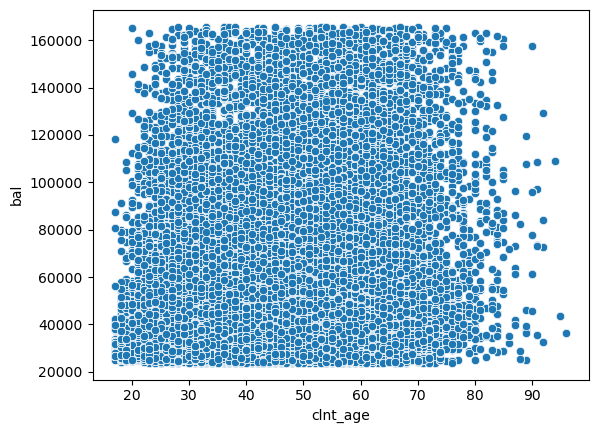

In [95]:
# Plotting a scatter plot to visualize the relationship between 'balance' and 'client age' || valor = 'Test'


sns.scatterplot(data=df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)], x='clnt_age', y='bal')

<Axes: xlabel='bal', ylabel='Count'>

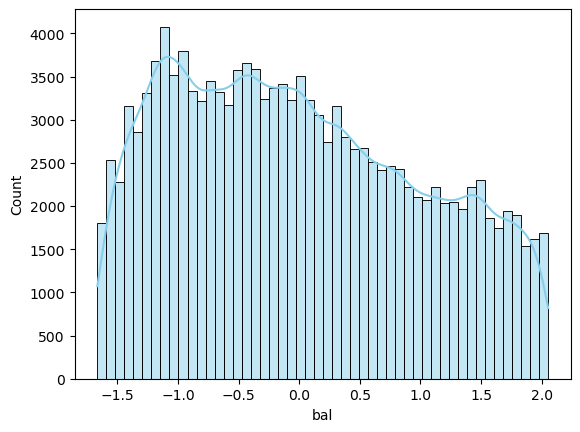

In [96]:
# Applying log transformation to 'SalePrice' and standardizing it
log_transformed_saleprice = np.log1p(df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]['bal'])
standardized_log_saleprice = (log_transformed_saleprice - log_transformed_saleprice.mean()) / log_transformed_saleprice.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_saleprice, kde=True, bins=50, color="skyblue")

Text(0.5, 1.0, 'Box-Cox Transformed bal-test')

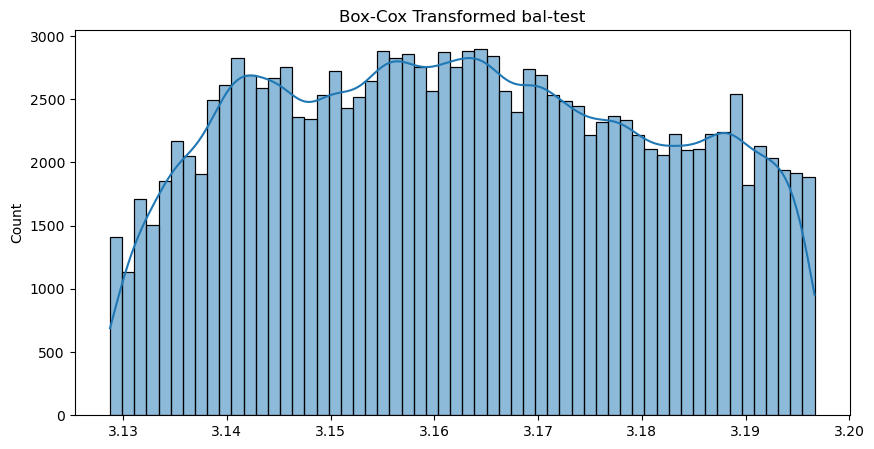

In [97]:
from scipy.stats import boxcox
import numpy as np

# Applying Box-Cox transformation to 'df_final'
df_boxcox_bal_test, _ = boxcox(df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]['bal'])

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'df_final'
sns.histplot(df_boxcox_bal_test, kde=True)
plt.title('Box-Cox Transformed bal-test')

((array([-4.41423579, -4.21839031, -4.11197141, ...,  4.11197141,
          4.21839031,  4.41423579]),
  array([3.12873827, 3.12873827, 3.12873827, ..., 3.19664119, 3.19664119,
         3.19664119])),
 (0.018053128420094912, 3.1626614048281563, 0.9831460465855946))

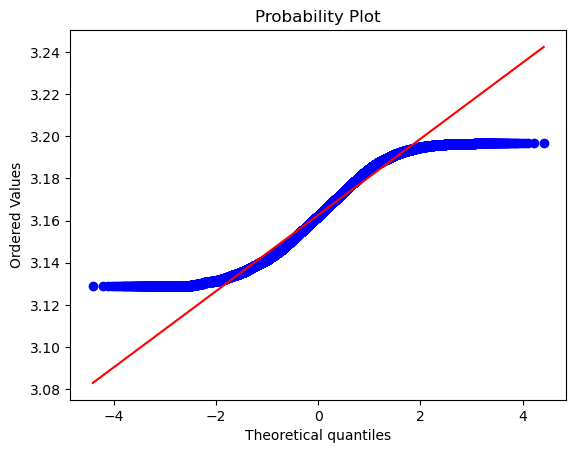

In [98]:
from scipy import stats

# Q-Q plot for transformed 'bal-test'
stats.probplot(df_boxcox_bal_test, plot=plt)

In [99]:
# Conducting the Kolmogorov-Smirnov test on the log-transformed and standardized 'bal-test'
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(df_boxcox_bal_test, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.9991222069570251, 0.0)

In [100]:
# print the test result
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of prices is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of prices is not significantly different from a normal distribution.')

The test results indicate that the distribution of prices is significantly different from a normal distribution.


In [101]:
correlation = df_final[df_final['variation'] == 'Test']['bal'].corr(df_final[df_final['variation'] == 'Test']['clnt_age'], method='spearman')
correlation

0.3529022006877168

<Axes: xlabel='clnt_age', ylabel='bal'>

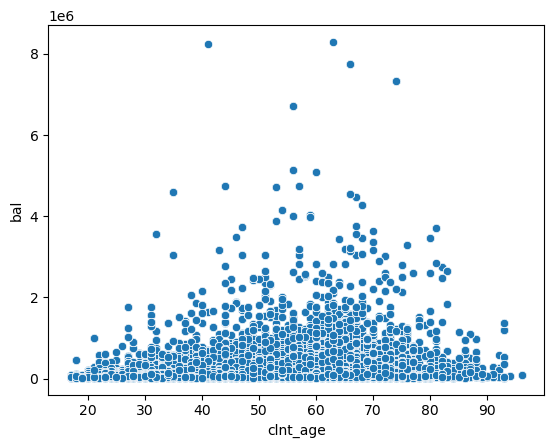

In [102]:
# Plotting a scatter plot to visualize the relationship between 'balance' and 'client age' || valor = 'Control'

sns.scatterplot(data=df_final[df_final['variation'] == 'Control'], x='clnt_age', y='bal')

In [103]:
correlation = df_final_merge[df_final_merge['variation'] == 'Control']['bal'].corr(df_final_merge[df_final_merge['variation'] == 'Control']['clnt_age'], method='spearman')
correlation

NameError: name 'df_final_merge' is not defined

<Axes: xlabel='clnt_age', ylabel='Count'>

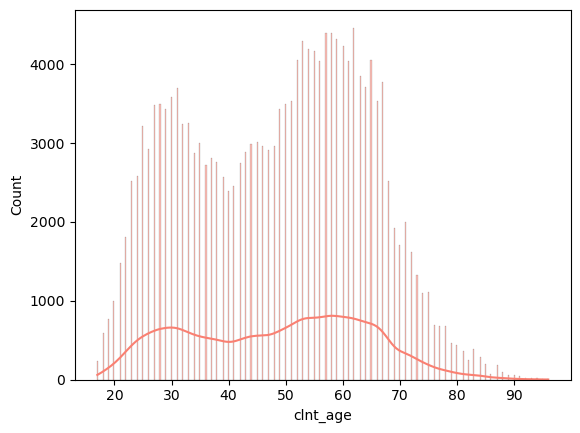

In [20]:
sns.histplot(df_final[df_final['variation'] == 'Test']['clnt_age'], kde=True, bins=int(177847 ** (1/2)), color="salmon")

Text(0.5, 1.0, 'Box-Cox Transformed age-test')

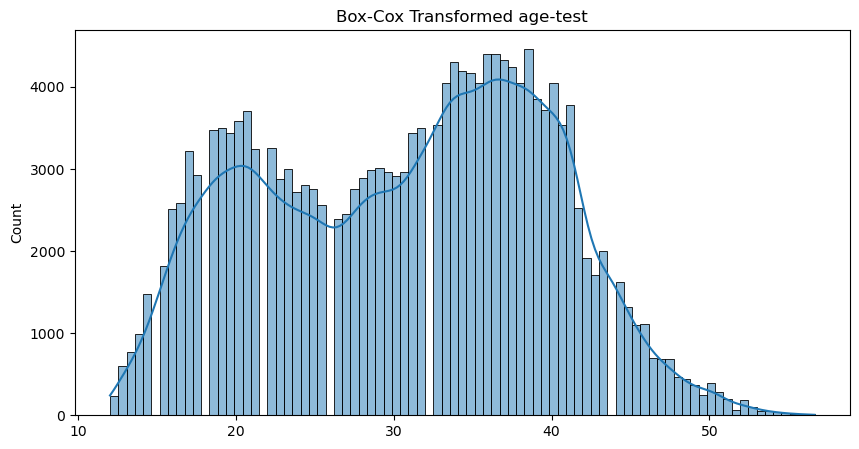

In [36]:
from scipy.stats import boxcox
import numpy as np

# Applying Box-Cox transformation to 'df_final'
df_boxcox_age_test, _ = boxcox(df_final[df_final['variation'] == 'Test']['clnt_age'])

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'df_final'
sns.histplot(df_boxcox_age_test, kde=True)
plt.title('Box-Cox Transformed age-test')

In [23]:
df_final[df_final['variation'] == 'Test']['clnt_age']

0         79.0
1         79.0
2         79.0
3         79.0
4         79.0
          ... 
321304    66.0
321305    66.0
321306    66.0
321307    66.0
321308    66.0
Name: clnt_age, Length: 177847, dtype: float64